In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('balanced_dataset.csv')

In [3]:
df.drop(['Adult'],inplace=True,axis=1)

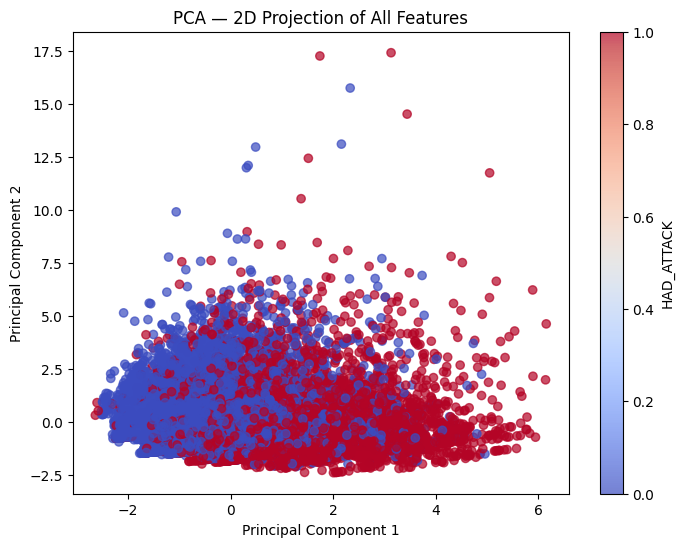

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features and target
X = df.drop(columns=['HAD_ATTACK'])
y = df['HAD_ATTACK']

# Standardize numeric features
X_scaled = StandardScaler().fit_transform(X.select_dtypes(include=['float64', 'int64']))

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of 2D projection
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA — 2D Projection of All Features')
plt.colorbar(label='HAD_ATTACK')

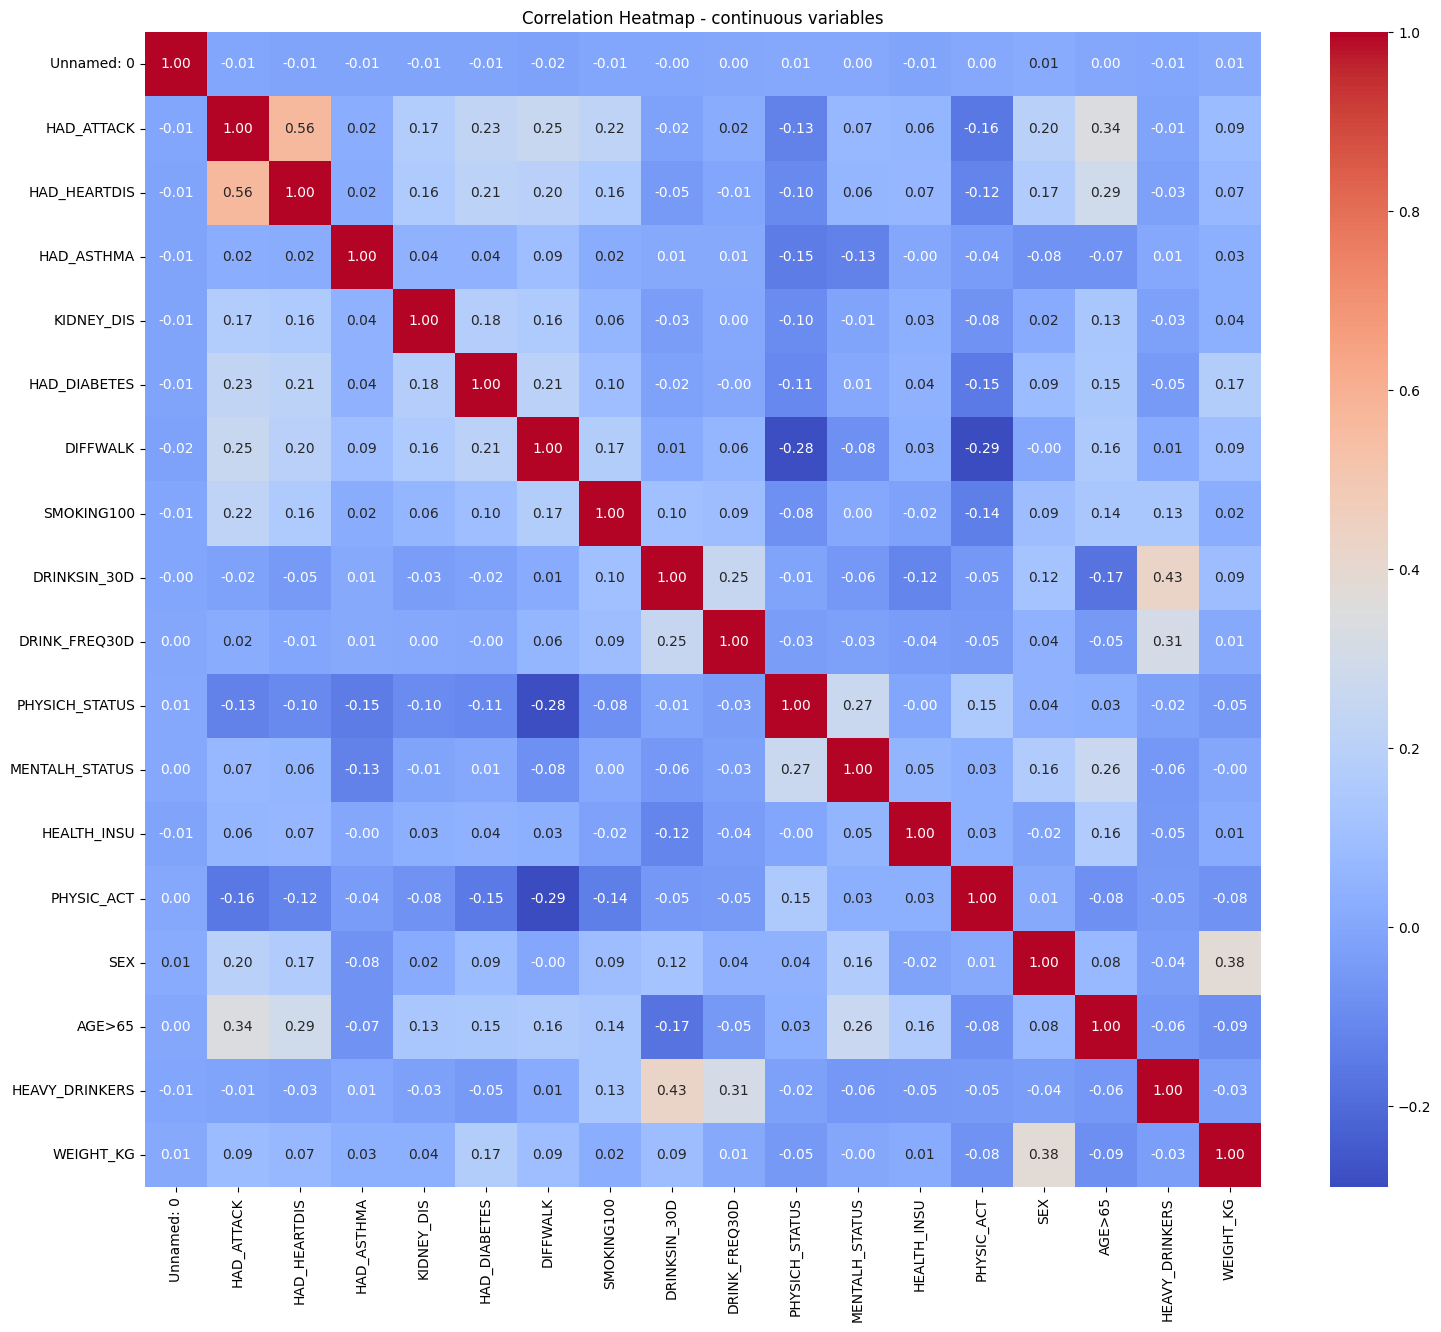

In [5]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - continuous variables")
plt.show()

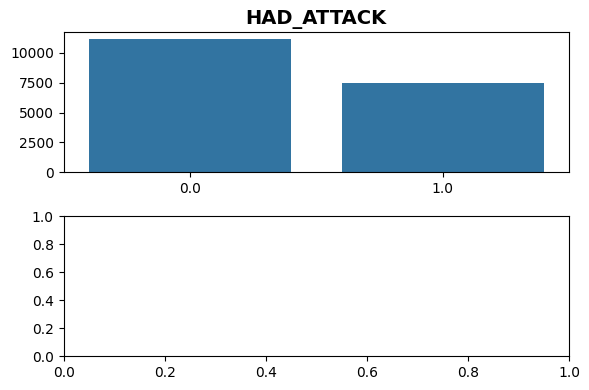

In [6]:

target_column=['HAD_ATTACK']

fig, axes = plt.subplots(2, figsize=(6,4))
axes = axes.flatten()

for i, col in enumerate(target_column):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


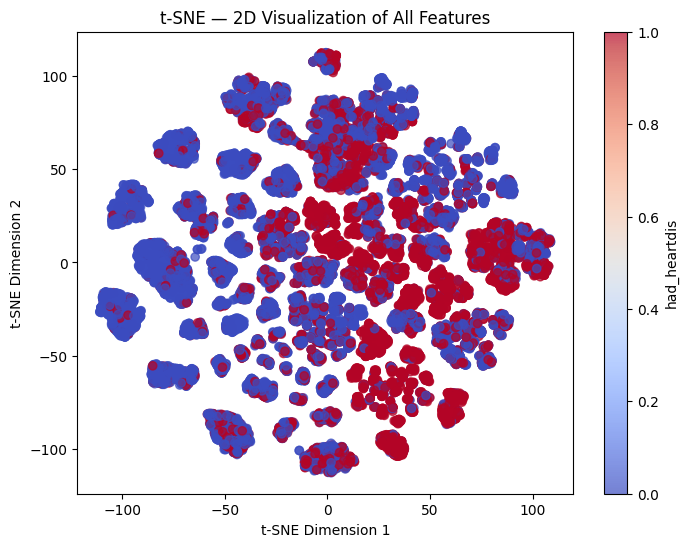

In [7]:
from sklearn.manifold import TSNE

# Run t-SNE on standardized features
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE — 2D Visualization of All Features')
plt.colorbar(label='had_heartdis')
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state =1001)

In [9]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import recall_score, accuracy_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score
clf = LinearSVC(C=1, class_weight='balanced', max_iter=20000, dual=False,penalty='l1')
clf.fit(X_train, y_train)

y_dec = clf.decision_function(X_test)
y_pred = (y_dec >= -0.3).astype(int)   
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("f1_score:",f1_score(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))

Accuracy: 0.7356970185334408
Recall: 0.8479201331114808
precision: 0.6277408228627741
f1_score: 0.7214043035107588
AUC-ROC: 0.7538407240653103


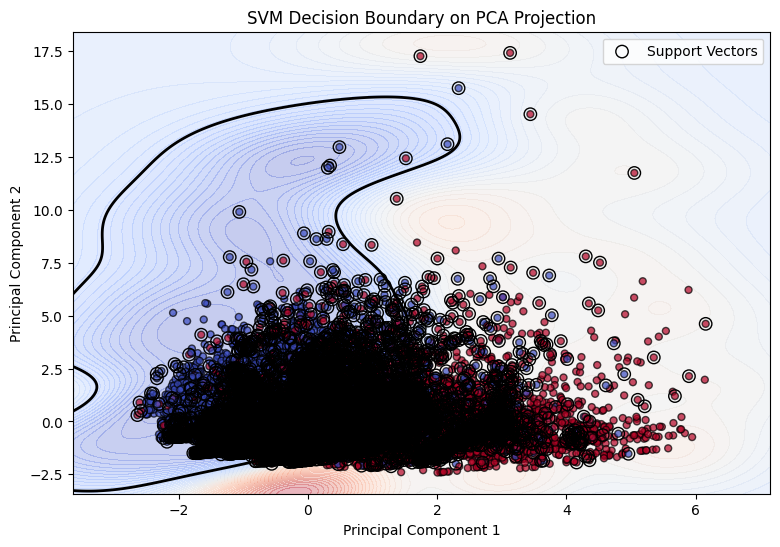

In [10]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#  Train SVM (RBF kernel works best for non-linear separation)
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_pca, y)

#  Create grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

#  Predict class probability for grid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#  Plot
plt.figure(figsize=(9, 6))
# Decision boundary and margins
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50),
             cmap='coolwarm', alpha=0.3)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Scatter data points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=25, edgecolor='k', alpha=0.7)

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("SVM Decision Boundary on PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [11]:



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, classification_report,precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier




target_col = "HAD_HEARTDIS"  # Target column (1=Yes, 2=No)


X = df.drop(columns=[target_col])
y = df[target_col]




numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])





X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)




xgb_model = XGBClassifier(
    n_estimators=300,         # number of trees
    learning_rate=0.05,       # smaller LR for stability
    max_depth=6,              # reasonable depth
    subsample=0.8,            # prevent overfitting
    colsample_bytree=0.8,     # feature sampling
    scale_pos_weight=3,       # handle class imbalance
    reg_lambda=1,             # L2 regularization
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    tree_method='hist'        # fast CPU mode (use 'gpu_hist' if GPU available)
)


xgb_model.fit(X_res, y_res)



y_pred = xgb_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
recall = precision_score(y_test, y_pred)

print(f" Accuracy: {accuracy*100:.2f}%")
print(f" Recall: {recall*100:.2f}%\n")
print(" Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\abhia\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:23:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Accuracy: 79.49%
 Recall: 52.10%

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.78      0.85      5805
         1.0       0.52      0.86      0.65      1641

    accuracy                           0.79      7446
   macro avg       0.74      0.82      0.75      7446
weighted avg       0.86      0.79      0.81      7446



In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, classification_report,precision_score
import pandas as pd
import numpy as np



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")




# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", np.bincount(y_train_res.astype(int)))



X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_res.values.astype(int), dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values.astype(int), dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=128, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=256, shuffle=False)




class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.attn = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.Tanh(),
            nn.Linear(input_dim, 1)
        )

    def forward(self, x):
        weights = torch.softmax(self.attn(x), dim=1)
        context = torch.sum(weights * x, dim=1)
        return context

class MLPWithAttention(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.attn = AttentionLayer(input_dim)
        self.net = nn.Sequential(
            nn.Linear(input_dim + input_dim, 256),  # concat input + context
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        context = self.attn(x)
        out = torch.cat([x, context.unsqueeze(1).repeat(1, x.shape[1])], dim=1)
        return self.net(out)

model = MLPWithAttention(X_train_scaled.shape[1]).to(device)




class_weights = torch.tensor([1.0, 3.0], dtype=torch.float32).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
epochs = 200




for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")



model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in test_loader:
        preds = model(xb)
        y_true.extend(yb.cpu().numpy())
        y_pred.extend(torch.argmax(preds, dim=1).cpu().numpy())

acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(precision_score(y_true, y_pred))
print(f"\n Accuracy: {acc*100:.2f}%")
print(f" Recall: {recall*100:.2f}%")
print("\n Classification Report:\n", classification_report(y_true, y_pred))


Using device: cuda
After SMOTE: [8707 3482]
Epoch 1/200, Loss: 0.4845
Epoch 2/200, Loss: 0.4024
Epoch 3/200, Loss: 0.4013
Epoch 4/200, Loss: 0.3971
Epoch 5/200, Loss: 0.3931
Epoch 6/200, Loss: 0.3960
Epoch 7/200, Loss: 0.3908
Epoch 8/200, Loss: 0.3907
Epoch 9/200, Loss: 0.3880
Epoch 10/200, Loss: 0.3887
Epoch 11/200, Loss: 0.3834
Epoch 12/200, Loss: 0.3849
Epoch 13/200, Loss: 0.3861
Epoch 14/200, Loss: 0.3835
Epoch 15/200, Loss: 0.3813
Epoch 16/200, Loss: 0.3829
Epoch 17/200, Loss: 0.3824
Epoch 18/200, Loss: 0.3804
Epoch 19/200, Loss: 0.3781
Epoch 20/200, Loss: 0.3785
Epoch 21/200, Loss: 0.3753
Epoch 22/200, Loss: 0.3762
Epoch 23/200, Loss: 0.3730
Epoch 24/200, Loss: 0.3756
Epoch 25/200, Loss: 0.3753
Epoch 26/200, Loss: 0.3713
Epoch 27/200, Loss: 0.3686
Epoch 28/200, Loss: 0.3707
Epoch 29/200, Loss: 0.3720
Epoch 30/200, Loss: 0.3717
Epoch 31/200, Loss: 0.3641
Epoch 32/200, Loss: 0.3629
Epoch 33/200, Loss: 0.3623
Epoch 34/200, Loss: 0.3641
Epoch 35/200, Loss: 0.3630
Epoch 36/200, Loss: 

 Best tuned threshold (validation): 0.340

Classification Report (Test Set):
              precision    recall  f1-score   support

           0      0.865     0.673     0.757      2234
           1      0.632     0.842     0.722      1489

    accuracy                          0.741      3723
   macro avg      0.748     0.758     0.740      3723
weighted avg      0.772     0.741     0.743      3723


Confusion Matrix (Test Set):
          Pred_0  Pred_1
Actual_0    1504     730
Actual_1     235    1254

Overall Metrics:
Accuracy                 : 0.741
Precision (class 1)      : 0.632
Recall (class 1)         : 0.842
F1 (class 1)             : 0.722
ROC AUC                  : 0.855


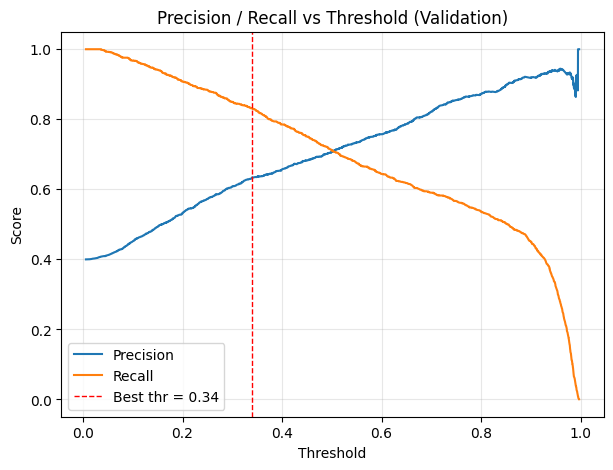


Predictions saved to: xgb_tuned_predictions.csv


In [13]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_curve, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.utils import resample
from xgboost import XGBClassifier


for col in list(df.columns):
    if col.lower().startswith("unnamed"):
        df.drop(columns=[col], inplace=True)

target_col = "HAD_ATTACK"
y = df[target_col].astype(int)
X = df.drop(columns=[target_col])


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)


train_df = pd.concat([X_train, y_train], axis=1)
maj = train_df[train_df[target_col] == 0]
minr = train_df[train_df[target_col] == 1]

maj_down = resample(maj, replace=False, n_samples=len(minr), random_state=42)
train_bal = pd.concat([maj_down, minr]).sample(frac=1, random_state=42)

X_train_bal = train_bal.drop(columns=[target_col])
y_train_bal = train_bal[target_col].astype(int)




scale_pos_weight = float((y_train_bal == 0).sum() / (y_train_bal == 1).sum())

model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=7,
    min_child_weight=3,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.2,
    reg_alpha=0.2,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
    tree_method="hist",
    scale_pos_weight=scale_pos_weight
)

model.fit(X_train_bal, y_train_bal)





val_proba = model.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, val_proba)
f1 = np.where((prec + rec) > 0, 2 * prec * rec / (prec + rec), 0)
best_idx = np.argmax(f1[:-1])
best_thr = thr[best_idx]
print(f" Best tuned threshold (validation): {best_thr:.3f}")




test_proba = model.predict_proba(X_test)[:, 1]
y_pred_test = (test_proba >= best_thr).astype(int)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test, digits=3))

cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=["Actual_0", "Actual_1"], columns=["Pred_0", "Pred_1"])
print("\nConfusion Matrix (Test Set):")
print(cm_df)

# Overall metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision (class 1)": precision_score(y_test, y_pred_test, zero_division=0),
    "Recall (class 1)": recall_score(y_test, y_pred_test, zero_division=0),
    "F1 (class 1)": f1_score(y_test, y_pred_test, zero_division=0),
    "ROC AUC": roc_auc_score(y_test, test_proba)
}
print("\nOverall Metrics:")
for k, v in metrics.items():
    print(f"{k:25s}: {v:.3f}")



plt.figure(figsize=(7, 5))
plt.plot(thr, prec[:-1], label="Precision")
plt.plot(thr, rec[:-1], label="Recall")
plt.axvline(best_thr, color="r", ls="--", lw=1, label=f"Best thr = {best_thr:.2f}")
plt.title("Precision / Recall vs Threshold (Validation)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(alpha=0.3)
plt.show()




pd.DataFrame({
    "y_test": y_test.values,
    "proba": test_proba,
    "y_pred": y_pred_test
}).to_csv("xgb_tuned_predictions.csv", index=False)

print("\nPredictions saved to: xgb_tuned_predictions.csv")
